# Flight Explanatory Data Analysis
## Olawale Olushola


## Investigation Overview
> This project investigates a dataset that reports flights in the United States from January 2007 to April 2008, including departure delays, and reasons for delays. 


## Dataset Overview

> - The dataset includes approximately 9.6 million flight details with 29 features which after cleaning we had aprroximately 4.6 millions rows and 25 features. 
- The information gathered covered the years 2007 and 2008. 
- The variables in the dataset include information about flights origin, departure, date and time of the flight, duration, cancellation status, delay (and cause of delay), and so on.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

flight =pd.read_csv('master_flightsData.csv')

flight.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,Sep,25,Tues,0 days 09:05:00.000000000,0 days 09:15:00.000000000,0 days 11:39:00.000000000,0 days 12:02:00.000000000,XE,2416,...,EWR,SAV,708,0,NaN,0.0,0.0,0.0,0.0,0.0
1,2007,Aug,31,Fri,0 days 15:59:00.000000000,0 days 15:35:00.000000000,0 days 16:39:00.000000000,0 days 16:25:00.000000000,WN,1718,...,BWI,BNA,588,0,NaN,0.0,0.0,0.0,0.0,0.0
2,2007,Aug,27,Mon,0 days 09:58:00.000000000,0 days 10:00:00.000000000,0 days 12:04:00.000000000,0 days 12:08:00.000000000,FL,424,...,PNS,ATL,272,0,NaN,0.0,0.0,0.0,0.0,0.0
3,2007,May,8,Tues,0 days 14:35:00.000000000,0 days 14:35:00.000000000,0 days 15:38:00.000000000,0 days 15:48:00.000000000,NW,931,...,MEM,BTR,319,0,NaN,0.0,0.0,0.0,0.0,0.0
4,2007,Jun,18,Mon,NaN,0 days 08:00:00.000000000,NaN,0 days 09:41:00.000000000,UA,1433,...,ORD,PHX,1440,1,A,0.0,0.0,0.0,0.0,0.0


## Cancelled Flights Distribution

> ### Proportion of cancelled flights 
Out of 4.6 million flights from Jan 2007 to Apr 2008, about 112k flights (2.4%) were cancelled.

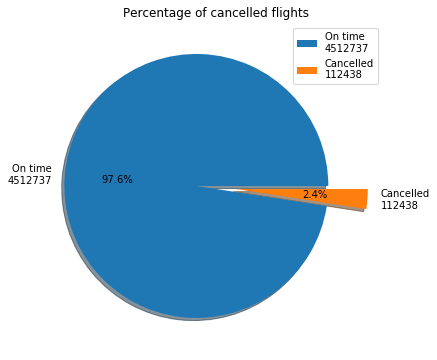

In [6]:
# Return the Series having frequency count of each unique value

cancelled_flight = flight['Cancelled'].value_counts()

# plot visualization

fig =plt.figure(figsize=(6,6))
labels =f'On time\n{cancelled_flight.values[0]}', f'Cancelled\n{cancelled_flight.values[1]}'
explode = (0,0.3)
plt.pie(cancelled_flight, explode = explode, labels=labels, autopct='%.1f%%', shadow = True)
plt.axis('equal')
plt.legend(loc ='upper right')

plt.title('Percentage of cancelled flights');

## Cancelled Flight Distribution by reason
> - The majority of flights (40.97%) were canceled due to Carrier reasons, followed by Weather (39.42%).
- Security concerns account for a negligible proportion of cancelled flights (0.02%).

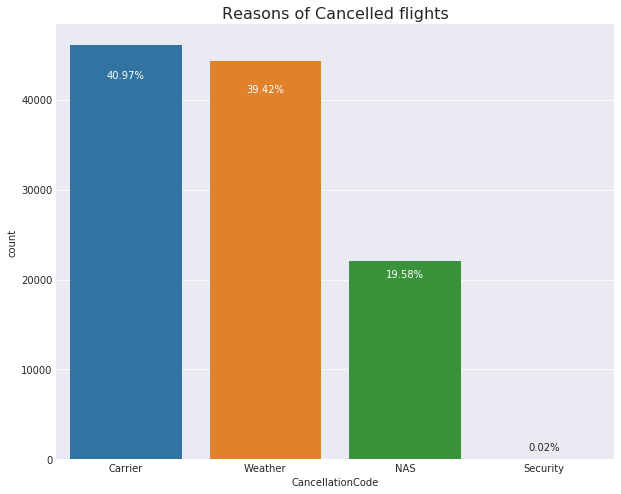

In [9]:
#bar plot
plt.figure(figsize=(10, 8))

sb.set_style('darkgrid')

sb.countplot(data=flight, x='CancellationCode')


# add annotations
gen_counts = flight['CancellationCode'].value_counts()
# take proportion only out of Cancelled flights, not total dataframe
n_points = gen_counts.sum()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = gen_counts[label.get_text()]
    pct_string = f'{100*count/n_points:0.2f}%'
    
    # print the annotation just below the top of the bar
    if count > 2000:
        # print the annotation just below the top of the bar
        plt.text(loc, 0.92*count, pct_string, ha = 'center', color = 'w')
    else:
        plt.text(loc, 1000, pct_string, ha = 'center')  
        
cancel_codes = ['Carrier', 'Weather', 'NAS', 'Security']
plt.xticks(locs, cancel_codes);

# Title
plt.title('Reasons of Cancelled flights', fontsize = 16);


## Top 10 Busiest Airport with the most Delayed Flight

> - ATL is the busiest airport, with 26.7% of flights delayed. 
- EWR has the highest proportion of delayed flights (32.5%) among the top ten busiest airports.




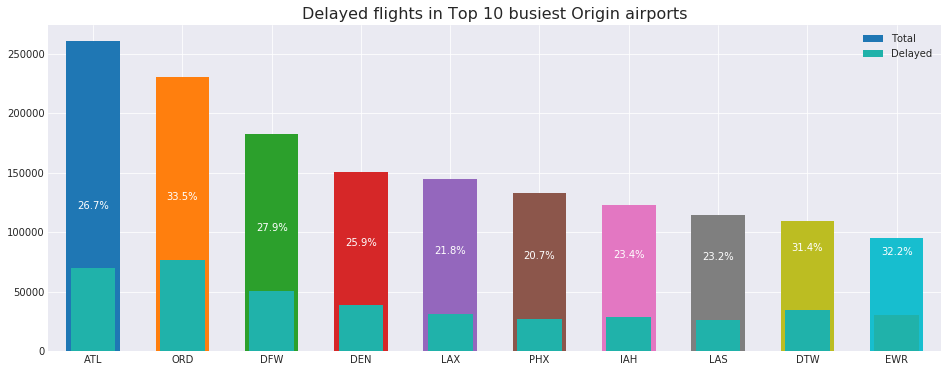

In [11]:
#query arrival delay greater than 15 mins 

df_delay = flight.query('ArrDelay>= 15')

plt.figure(figsize=(16, 6))
gen_counts = flight['Origin'].value_counts()[:10]

delayed_gen_counts = df_delay['Origin'].value_counts()[:10]
gen_counts.plot.bar(label='Total', width=.6)

# sns.barplot(gen_counts.index, gen_counts.values, order=gen_counts.index, label='Total', color=base_color)
# use order or reindex

delayed_gen_counts.reindex(gen_counts.index).plot.bar(label='Delayed', color='lightseagreen')

# sns.barplot(delayed_gen_counts.index, delayed_gen_counts.values, order=gen_counts.index, label='Delayed', color='lightseagreen')
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = gen_counts[label.get_text()]
    delayed_count = delayed_gen_counts[label.get_text()]
    pct_string = f'{100*delayed_count/count:0.1f}%'
    
    # print the annotation just below the top of the bar
    plt.text(loc, delayed_count+0.05e6, pct_string, ha = 'center', color='w')

# legend, xtick values and title

plt.legend()
plt.xticks(rotation=0)
plt.title('Delayed flights in Top 10 busiest Origin airports', fontsize=16);


## Proportion of Delays By Cause of Delay

- A delay occurs if the arrival time is greater than 15min
- Late Aircraft accounts for the greatest proportion of delay (37.55%)
- The maximum average delay of approximately 21mins is also attributed to late arrival of the aircraft.

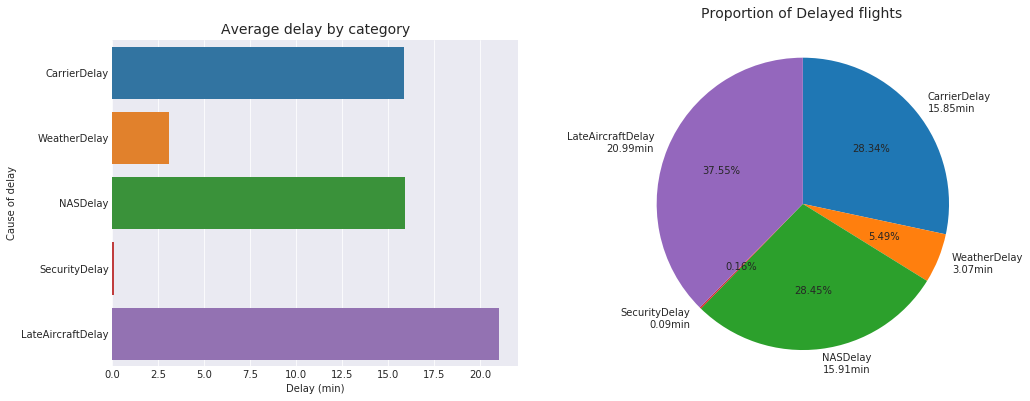

In [13]:
# define the shape size

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)

# Plot the barplot
means = [df_delay[i].mean() for i in ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]
sb.barplot(means, ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'])

# Define the x and y label and add title
plt.xlabel('Delay (min)')
plt.ylabel('Cause of delay')
plt.title('Average delay by category', fontsize=14)

# plot the circle graph
plt.subplot(1, 2, 2)
labels = [f'{j}\n{means[i]:.2f}min' for i, j in enumerate(['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'])]
plt.pie(means, labels=labels, startangle=90, counterclock=False, autopct='%.2f%%');
plt.axis('square');
plt.title('Proportion of Delayed flights\n', fontsize=14);

### Thank You

In [1]:
#!jupyter nbconvert Part_II_notebook.ipynb --to slides --post serve --no-input --no-prompt